In [2]:
!pip install numpy
!pip install pandas

  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 10.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 18.8 MB/s  0:00:00
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------------------------------------- 0/2 [tzdata]
   ---------------------------------------- 0/2 [tzdata]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   ----

In [3]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('data.csv')
print(df)

   emp_id         name  age  department         designation   salary  \
0     101  Amit Sharma   28          IT   Software Engineer  55000.0   
1     102   Riya Verma   32          HR          HR Manager  60000.0   
2     103  Rahul Mehta   26          IT   Backend Developer      NaN   
3     104   Sneha Iyer   35     Finance          Accountant  65000.0   
4     105  Arjun Singh   29       Sales     Sales Executive  45000.0   
5     106   Neha Gupta   31          IT  Frontend Developer  52000.0   
6     107   Vikram Rao   38  Operations  Operations Manager  72000.0   
7     108   Pooja Nair   27          HR        HR Executive  42000.0   

   experience       city  
0           4  Bangalore  
1           8      Delhi  
2           3       Pune  
3          10    Chennai  
4           5     Mumbai  
5           6  Bangalore  
6          14  Hyderabad  
7           2      Kochi  


In [5]:
# Display Employees withdrawing more than 50000
print(df[(df["salary"] > 50000) & (df["department"] == "IT")])

# Count Employees withdrawing morethan 50000
print(df[df["salary"] > 50000].shape[0])

   emp_id         name  age department         designation   salary  \
0     101  Amit Sharma   28         IT   Software Engineer  55000.0   
5     106   Neha Gupta   31         IT  Frontend Developer  52000.0   

   experience       city  
0           4  Bangalore  
5           6  Bangalore  
5


In [8]:
print(df[df["salary"] == df["salary"].max()])

   emp_id        name  age  department         designation   salary  \
6     107  Vikram Rao   38  Operations  Operations Manager  72000.0   

   experience       city  
6          14  Hyderabad  


In [11]:
print(df.sort_values(by= "salary", ascending= False))

   emp_id         name  age  department         designation   salary  \
6     107   Vikram Rao   38  Operations  Operations Manager  72000.0   
3     104   Sneha Iyer   35     Finance          Accountant  65000.0   
1     102   Riya Verma   32          HR          HR Manager  60000.0   
0     101  Amit Sharma   28          IT   Software Engineer  55000.0   
5     106   Neha Gupta   31          IT  Frontend Developer  52000.0   
4     105  Arjun Singh   29       Sales     Sales Executive  45000.0   
7     108   Pooja Nair   27          HR        HR Executive  42000.0   
2     103  Rahul Mehta   26          IT   Backend Developer      NaN   

   experience       city  
6          14  Hyderabad  
3          10    Chennai  
1           8      Delhi  
0           4  Bangalore  
5           6  Bangalore  
4           5     Mumbai  
7           2      Kochi  
2           3       Pune  


In [12]:
print(df.groupby("city").size())

city
Bangalore    2
Chennai      1
Delhi        1
Hyderabad    1
Kochi        1
Mumbai       1
Pune         1
dtype: int64


In [17]:
print(df[df["salary"].isnull()])

   emp_id         name  age department        designation  salary  experience  \
2     103  Rahul Mehta   26         IT  Backend Developer     NaN           3   

   city  
2  Pune  


In [43]:
print(df["salary"].mean())
import math
df = df.fillna(math.floor(df["salary"].mean()))

df.to_csv("data.csv", index=False)

55857.142857142855


In [44]:
df["bonus"] = 5000
df = df.drop(columns= "bonus")
print(df)

   emp_id         name  age  department         designation   salary  \
0     101  Amit Sharma   28          IT   Software Engineer  55000.0   
1     102   Riya Verma   32          HR          HR Manager  60000.0   
2     103  Rahul Mehta   26          IT   Backend Developer  55857.0   
3     104   Sneha Iyer   35     Finance          Accountant  65000.0   
4     105  Arjun Singh   29       Sales     Sales Executive  45000.0   
5     106   Neha Gupta   31          IT  Frontend Developer  52000.0   
6     107   Vikram Rao   38  Operations  Operations Manager  72000.0   
7     108   Pooja Nair   27          HR        HR Executive  42000.0   

   experience       city  new_salary  
0           4  Bangalore     60500.0  
1           8      Delhi     72000.0  
2           3       Pune     55857.0  
3          10    Chennai     84500.0  
4           5     Mumbai     47250.0  
5           6  Bangalore     57200.0  
6          14  Hyderabad     75600.0  
7           2      Kochi     50400.0  


In [55]:
df.fillna(df["salary"].median())
df["new_salary"] = df["salary"]
df.loc[df["department"] == "HR", "new_salary"] = df["salary"] * 1.20
df.loc[df["department"] == "IT", "new_salary"] = df["salary"] * 1.10
df.loc[df["department"] == "Finance", "new_salary"] = df["salary"] * 1.30
df.loc[
    ~df["department"].isin(["HR", "IT", "Finance"]),
    "new_salary"
] = df["salary"] * 1.05
print(df)

   emp_id         name  age department         designation   salary  \
0     101  Amit Sharma   28          1   Software Engineer  55000.0   
1     102   Riya Verma   32          2          HR Manager  60000.0   
2     103  Rahul Mehta   26          1   Backend Developer  55857.0   
3     104   Sneha Iyer   35          3          Accountant  65000.0   
4     105  Arjun Singh   29          4     Sales Executive  45000.0   
5     106   Neha Gupta   31          1  Frontend Developer  52000.0   
6     107   Vikram Rao   38          5  Operations Manager  72000.0   
7     108   Pooja Nair   27          2        HR Executive  42000.0   

   experience       city  new_salary  
0           4  Bangalore    57750.00  
1           8      Delhi    63000.00  
2           3       Pune    58649.85  
3          10    Chennai    68250.00  
4           5     Mumbai    47250.00  
5           6  Bangalore    54600.00  
6          14  Hyderabad    75600.00  
7           2      Kochi    44100.00  


In [56]:
df["department"] = df["department"].replace("IT", 1)
df["department"] = df["department"].replace("HR", 2)
df["department"] = df["department"].replace("Finance", 3)
df["department"] = df["department"].replace("Sales", 4)
df["department"] = df["department"].replace("Operations", 5)

In [57]:
print(df)

   emp_id         name  age department         designation   salary  \
0     101  Amit Sharma   28          1   Software Engineer  55000.0   
1     102   Riya Verma   32          2          HR Manager  60000.0   
2     103  Rahul Mehta   26          1   Backend Developer  55857.0   
3     104   Sneha Iyer   35          3          Accountant  65000.0   
4     105  Arjun Singh   29          4     Sales Executive  45000.0   
5     106   Neha Gupta   31          1  Frontend Developer  52000.0   
6     107   Vikram Rao   38          5  Operations Manager  72000.0   
7     108   Pooja Nair   27          2        HR Executive  42000.0   

   experience       city  new_salary  
0           4  Bangalore    57750.00  
1           8      Delhi    63000.00  
2           3       Pune    58649.85  
3          10    Chennai    68250.00  
4           5     Mumbai    47250.00  
5           6  Bangalore    54600.00  
6          14  Hyderabad    75600.00  
7           2      Kochi    44100.00  


In [58]:
df.to_csv("data.csv")

In [62]:
df1 = pd.read_csv("department_data.csv")
print(df1)

df3 = df.merge(df1, on= "department", how="inner")
print(df3)

df4 = pd.merge(df, df1, left_on= "department", right_on= "department")
print(df4)

   department     dep_name
0           1           IT
1           2           HR
2           3      Finance
3           4        Sales
4           5   Operations
   emp_id         name  age department         designation   salary  \
0     101  Amit Sharma   28          1   Software Engineer  55000.0   
1     102   Riya Verma   32          2          HR Manager  60000.0   
2     103  Rahul Mehta   26          1   Backend Developer  55857.0   
3     104   Sneha Iyer   35          3          Accountant  65000.0   
4     105  Arjun Singh   29          4     Sales Executive  45000.0   
5     106   Neha Gupta   31          1  Frontend Developer  52000.0   
6     107   Vikram Rao   38          5  Operations Manager  72000.0   
7     108   Pooja Nair   27          2        HR Executive  42000.0   

   experience       city  new_salary     dep_name  
0           4  Bangalore    57750.00           IT  
1           8      Delhi    63000.00           HR  
2           3       Pune    58649.85      

In [63]:
df4.to_csv("output_data.csv")

In [65]:
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
Using cached pillow-12.1.0-cp314-cp314-win_amd64.whl (7.2 MB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

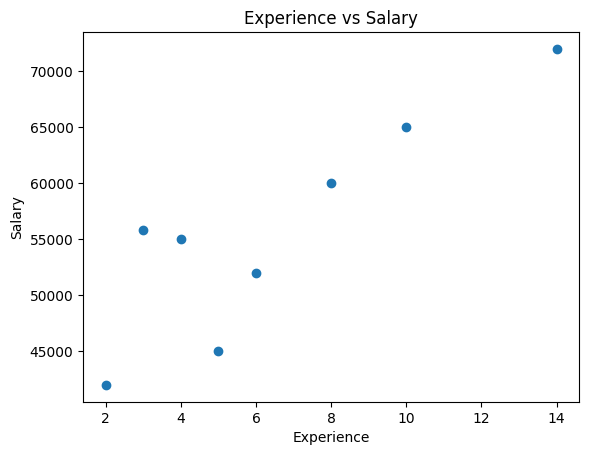

In [74]:
import matplotlib.pyplot as plt
plt.scatter(df["experience"], df["salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

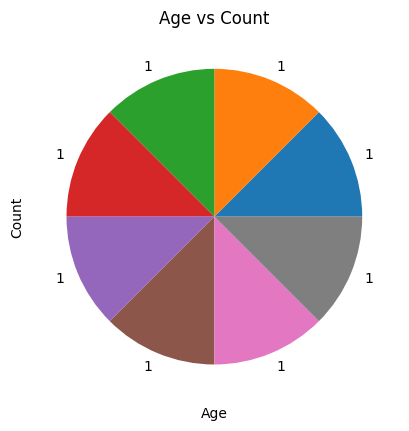

In [87]:
plt.pie(df["age"].value_counts(), labels = df["age"].value_counts()) # autopct = "%1.1f%%"
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs Count")
plt.show()

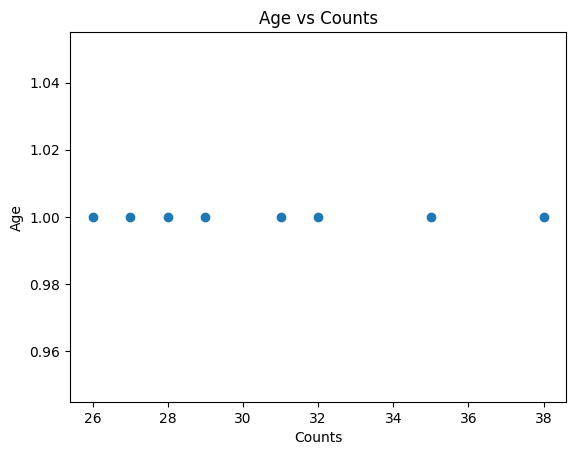

In [ ]:
arr = df["age"].value_counts()
plt.scatter(arr.index, arr.values)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age vs Counts")
plt.show()

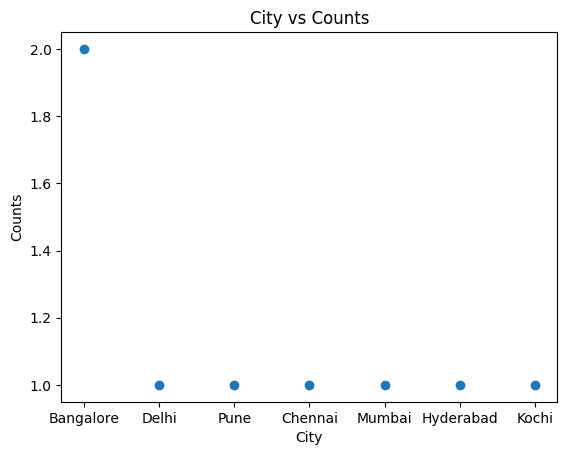

In [ ]:
arr = df["city"].value_counts()
plt.scatter(arr.index, arr.values)
plt.xlabel("City")
plt.ylabel("Counts")
plt.title("City wise distribution")
plt.show()

In [96]:
!pip install seaborn

<Axes: xlabel='experience', ylabel='salary'>

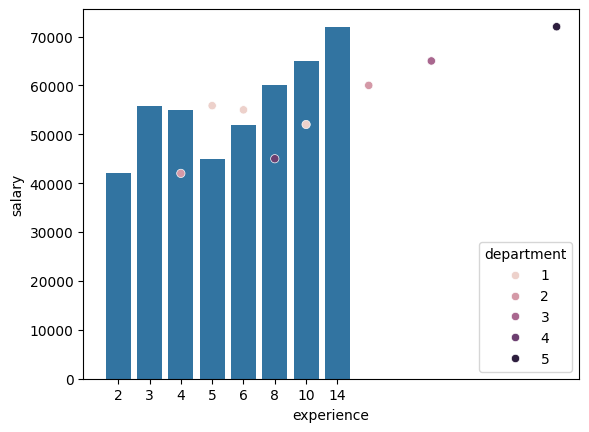

In [97]:
import seaborn as sns
sns.barplot(data=df, x="experience", y="salary")

sns.scatterplot(data=df, x="experience", y="salary", hue="department")